In [20]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerTuple

import matplotlib as mpl

plt.rcParams.update({"text.usetex": False, 
                     "font.family" : "serif", "font.serif" : ["Computer Modern Serif"]})
#mpl.rcParams.update(mpl.rcParamsDefault)

In [21]:
instance_file = '../../instances/berlin_db=1.00_dt=uniform.json'
with open(instance_file) as f:
    data = json.load(f)

# Uniform

In [22]:
all_area_scenarios = []
for scenario in data['scenarios']:
    for area_id in range(len(scenario['data'])):
        all_area_scenarios.append(scenario['data'][area_id])
all_area_scenarios_df = pd.DataFrame(all_area_scenarios)
area_ids = list(all_area_scenarios_df['area_id'].unique())
all_area_scenarios_df = all_area_scenarios_df.query(f'area_id == "{area_ids[area_id]}"')

In [23]:
all_area_scenarios = []
for scenario in data['scenarios']:
    for area_id in range(len(scenario['data'])):
        all_area_scenarios.append(scenario['data'][area_id])
all_area_scenarios_df = pd.DataFrame(all_area_scenarios)
area_ids = list(all_area_scenarios_df['area_id'].unique())
all_area_scenarios_df = all_area_scenarios_df.query(f'area_id == "{area_ids[area_id]}"')

In [24]:
for period in range(8):
    all_area_scenarios_df[f'demand_{period}'] = all_area_scenarios_df['demand'].apply(lambda x: int(x[period]) )
    all_area_scenarios_df[f'required_couriers_{period}'] = all_area_scenarios_df['required_couriers'].apply(lambda x: int(x[period]) )

melt_df = pd.melt(all_area_scenarios_df, id_vars='area_id', value_vars=[f'demand_{period}' for period in range(8)])
melt_df['period'] = melt_df['variable'].apply(lambda x: int(x.split('_')[-1]))
uniform_df = melt_df.groupby('period').agg({'value': 'sum'}).reset_index()

for period in range(8):
    all_area_scenarios_df[f'demand_{period}'] = all_area_scenarios_df['demand'].apply(lambda x: int(x[period]) )
    all_area_scenarios_df[f'required_couriers_{period}'] = all_area_scenarios_df['required_couriers'].apply(lambda x: int(x[period]) )

melt_df = pd.melt(all_area_scenarios_df, id_vars='area_id', value_vars=[f'demand_{period}' for period in range(8)])
melt_df['period'] = melt_df['variable'].apply(lambda x: int(x.split('_')[-1]))
uniform_df = melt_df.groupby('period').agg({'value': 'sum'}).reset_index()

In [25]:
instance_file = '../../instances/berlin_db=1.00_dt=doublepeak.json'
with open(instance_file) as f:
    data = json.load(f)

all_area_scenarios = []
for scenario in data['scenarios']:
    for area_id in range(len(scenario['data'])):
        all_area_scenarios.append(scenario['data'][area_id])
all_area_scenarios_df = pd.DataFrame(all_area_scenarios)
all_area_scenarios_df = all_area_scenarios_df.query(f'area_id == "{area_ids[area_id]}"')

for period in range(8):
    all_area_scenarios_df[f'demand_{period}'] = all_area_scenarios_df['demand'].apply(lambda x: int(x[period]) )
    all_area_scenarios_df[f'required_couriers_{period}'] = all_area_scenarios_df['required_couriers'].apply(lambda x: int(x[period]) )

melt_df = pd.melt(all_area_scenarios_df, id_vars='area_id', value_vars=[f'demand_{period}' for period in range(8)])
melt_df['period'] = melt_df['variable'].apply(lambda x: int(x.split('_')[-1]))

doublepeak_df = melt_df.groupby('period').agg({'value': 'sum'}).reset_index()

In [26]:
print(uniform_df['value'].sum())
print(doublepeak_df['value'].sum())

764
720


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following

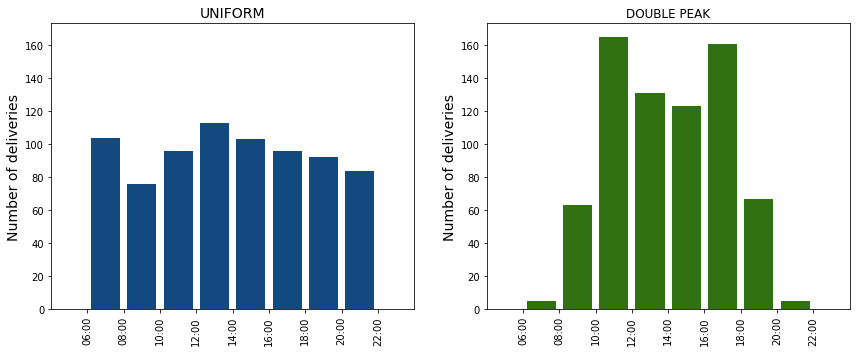

In [27]:
plt.rcParams['hatch.linewidth'] = 2

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

# XTICKS
hours = [6, 8, 10, 12, 14, 16, 18, 20, 22]
xtick_labels = [f'{hour:02d}:00' for hour in hours]
xtick_positions = [ i-1.5 for i in range(1, len(hours) + 1)]

sns.barplot(x=uniform_df['period'], y=uniform_df['value'],
            color='#004990', ax=axs[0], dodge=False)

# LABELS
axs[0].set_xlabel('')
axs[0].set_ylabel('Number of deliveries', fontsize=14)
#axs[0].yaxis.grid(which='major')
axs[0].axes.set_axisbelow(True)
axs[0].set_xlabel('')
axs[0].set_title('UNIFORM', fontsize=14)
axs[0].set_ylim(0, doublepeak_df['value'].max()*1.05)
axs[0].set_xticks(xtick_positions)
axs[0].set_xticklabels(xtick_labels, rotation=90)

# Set left and right margins
axs[0].set_xlim(-1.5, len(hours) - 0.5)

sns.barplot(x=doublepeak_df['period'], y=doublepeak_df['value'], 
            color='#2a8203', ax=axs[1], dodge=False)

# LABELS
axs[1].set_xlabel('')
axs[1].set_ylabel('Number of deliveries', fontsize=14)
#axs[1].yaxis.grid(which='major')
axs[1].axes.set_axisbelow(True)
axs[1].set_xlabel('')
axs[1].set_title('DOUBLE PEAK')
axs[1].set_ylim(0, doublepeak_df['value'].max()*1.05)
axs[1].set_xticks(xtick_positions)
axs[1].set_xticklabels(xtick_labels, rotation=90)

# Set left and right margins
axs[1].set_xlim(-1.5, len(hours) - 0.5)

fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
#fig.savefig('figures/demand_distibution.pdf', dpi=96, bbox_inches='tight')

plt.show()